In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sp_linalg

In [25]:
df = pd.read_csv('data/hw4_data/CFB2018_scores.csv', header = None)
teams = pd.read_csv('data/hw4_data/TeamNames.txt', header = None)

In [26]:
teams.columns = ['team_name']

In [27]:
df.columns = ['a_idx','a_pts','b_idx','b_pts']

In [28]:
M = np.zeros((767,767))

In [29]:
for row in df.iterrows():
    row= row[1]
    team_a = row['a_idx'] -1 
    team_b = row['b_idx'] -1 
    a_pts = row['a_pts']
    b_pts = row['b_pts']
    a_ind = 0
    b_ind =0 
    if a_pts > b_pts:
        a_ind = 1 
    else:
        b_ind =1 
    M[team_a][team_a] = M[team_a][team_a] + a_ind + a_pts/(a_pts+b_pts)
    M[team_b][team_b] = M[team_b][team_b] + b_ind + b_pts/(a_pts+b_pts)
    M[team_a][team_b] = M[team_a][team_b] + b_ind + b_pts/(a_pts+b_pts)
    M[team_b][team_a] = M[team_b][team_a] + a_ind + a_pts/(a_pts+b_pts)   
    

In [22]:
r_sums = M.sum(axis=1)
M= M / r_sums[:,np.newaxis]

In [8]:
wo = np.full((1,767),1/767)

In [9]:
eigval, eigvec = sp_linalg.eigs(M.T,k=1,which="LM")
ev1 = eigvec[:,0]
winf = ev1/ev1.sum()

In [17]:
wt = wo
out = []
norm_out = []
for i in range(10000):
    wt = np.matmul(wt,M)
    norm_out.append(np.linalg.norm((winf-wt), ord =1))
    if i in [9,99,999,9999]:
        rank = teams.iloc[np.argsort(-wt)[0]]
        wt_out = wt[0][np.argsort(-wt)[0]]
        out.append([wt_out,rank])

In [32]:
def create_report(out, which):
    df = pd.concat([out[which][1][0:25]['team_name'].reset_index(drop=True),pd.Series(out[which][0][:25])],axis=1)
    df.columns = ['team_name','w']
    print(df)

In [34]:
create_report(out,0)

             team_name         w
0   Mary Hardin-Baylor  0.017640
1              Clemson  0.014032
2          Mount Union  0.012249
3          Morningside  0.011157
4      North Dakota St  0.010944
5          Valdosta St  0.010343
6         St John's MN  0.009912
7              Alabama  0.009898
8        UW-Whitewater  0.009683
9            Ferris St  0.009671
10       Johns Hopkins  0.009448
11        Brockport St  0.006859
12           Princeton  0.006811
13     Minn St-Mankato  0.006735
14      Benedictine KS  0.006551
15     Kansas Wesleyan  0.005917
16          Ohio State  0.005844
17           Marian IN  0.005659
18           Bethel MN  0.005655
19          Muhlenberg  0.005540
20         Tarleton St  0.005476
21    Ouachita Baptist  0.005418
22             Georgia  0.005409
23          Notre Dame  0.005299
24       Notre Dame OH  0.005249


In [35]:
create_report(out,1)

             team_name         w
0   Mary Hardin-Baylor  0.060847
1              Clemson  0.048803
2              Alabama  0.027211
3          Mount Union  0.021396
4         St John's MN  0.014651
5          Morningside  0.013446
6          Valdosta St  0.012792
7      North Dakota St  0.012502
8              Georgia  0.011877
9           Ohio State  0.011871
10          Notre Dame  0.011583
11       UW-Whitewater  0.011481
12           Ferris St  0.011187
13            Oklahoma  0.010029
14       Johns Hopkins  0.009890
15           Texas A&M  0.008446
16                 LSU  0.007800
17             Florida  0.007782
18            Kentucky  0.007376
19               Texas  0.007278
20            Michigan  0.007193
21            Syracuse  0.006816
22     Central Florida  0.006538
23       Washington St  0.006380
24          Washington  0.006269


In [36]:
create_report(out,2)

             team_name         w
0              Clemson  0.097376
1              Alabama  0.053666
2              Georgia  0.023191
3           Ohio State  0.022592
4           Notre Dame  0.022337
5             Oklahoma  0.019113
6            Texas A&M  0.016575
7                  LSU  0.015152
8              Florida  0.015051
9      North Dakota St  0.014736
10            Kentucky  0.014335
11               Texas  0.013914
12            Michigan  0.013782
13            Syracuse  0.013223
14     Central Florida  0.012441
15  Mary Hardin-Baylor  0.011884
16          Washington  0.011317
17       Washington St  0.011222
18          Penn State  0.010118
19              Auburn  0.009977
20            Missouri  0.009722
21                Iowa  0.009648
22        Northwestern  0.009192
23       West Virginia  0.009174
24           Fresno St  0.008901


In [37]:
create_report(out,3)

          team_name         w
0           Clemson  0.103882
1           Alabama  0.057223
2           Georgia  0.024716
3        Ohio State  0.024055
4        Notre Dame  0.023797
5          Oklahoma  0.020352
6         Texas A&M  0.017669
7               LSU  0.016144
8           Florida  0.016036
9   North Dakota St  0.015302
10         Kentucky  0.015276
11            Texas  0.014817
12         Michigan  0.014679
13         Syracuse  0.014091
14  Central Florida  0.013244
15       Washington  0.012022
16    Washington St  0.011908
17       Penn State  0.010773
18           Auburn  0.010624
19         Missouri  0.010359
20             Iowa  0.010259
21     Northwestern  0.009784
22    West Virginia  0.009764
23        Fresno St  0.009452
24   South Carolina  0.008896


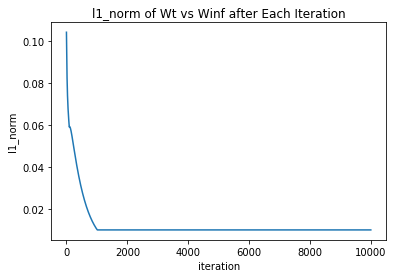

In [250]:
plt.plot(norm_out)
plt.ylabel('l1_norm')
plt.xlabel('iteration')
plt.title('l1_norm of Wt vs Winf after Each Iteration')
plt.show()

### 2

In [434]:
X = np.zeros((3012, 8447))

In [435]:
i = 0
f = open('data/hw4_data/nyt_data.txt')
for line in f.readlines():
    for w in line.split(','):
        cnt = w.split(':')
        X[int(cnt[0])-1][i] = int(cnt[1])
    i+=1

In [436]:
j =  0
vocabs=[]
f = open('data/hw4_data/nyt_vocab.dat')
for line in f.readlines():
    vocabs.append(line.split('\n')[0])

In [437]:
def normalize(v):
    return v / np.sum(v)

In [438]:
W = np.random.rand(3012,25) + 1
H = np.random.rand(25, 8447) + 1
out_arr = []
for i in range(100):
    
    ##Update H
    purp = X / (W.dot(H) + 1e-100)
    pink = np.apply_along_axis(normalize, 1, W.T)
    H *= pink.dot(purp)
    
    ##Update W 
    purp = X / (W.dot(H) + 1e-100)
    teal = np.apply_along_axis(normalize, 0, H.T)
    W *= purp.dot(teal)
    
    ##Calc Divergence
    out_arr.append(-np.sum(X * np.log(W.dot(H)+ 1e-100) - W.dot(H)))

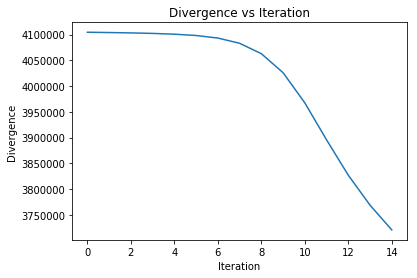

In [439]:
plt.plot(out_arr)
plt.ylabel('Divergence')
plt.xlabel('Iteration')
plt.title('Divergence vs Iteration')
plt.show()

In [289]:
W_norm = np.apply_along_axis(normalize, 0, W+ 1e-10)

In [393]:
report = []
for column in W_norm.T:
    top25= (-column).argsort()[:10]
    arr_out = []
    for word in top25:
        arr_out.append((vocabs[word] +" " "%.4f" % round(column[word],4)))
    report.append(arr_out)

In [394]:
matrix = [[0 for i in range(5)] for i in range(5)]

In [395]:
for idx,arr in enumerate(report):
    matrix[int(np.floor(idx/5))][idx%5] = arr

In [424]:
for i in matrix[4][0]:
    print(i)

thing 0.0250
lot 0.0191
really 0.0162
feel 0.0146
big 0.0135
kind 0.0116
little 0.0103
great 0.0097
hard 0.0090
put 0.0089
